In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import math

In [13]:
# Define the ticker symbols
tickers = ['PG', '^GSPC']

# Download the historical data
data = yf.download(tickers, start='2020-01-01', end='2025-01-01')['Close']

[*********************100%***********************]  2 of 2 completed


In [14]:
df = data.reset_index()
df = pd.DataFrame(df.values)
df.columns = [	'Date', 'PG', '^GSPC' ]
df = df.set_index('Date')

In [15]:
# Step 2: Calculate daily returns
returns = df.pct_change().dropna()

# Step 3: Compute expected returns and covariance matrix
mean_returns = returns.mean() * 252  # Annualized expected return
cov_matrix = returns.cov() * 252     # Annualized covariance matrix

<ipython-input-15-3f186f7ea94d>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  returns = df.pct_change().dropna()


In [16]:
# Step 4: Monte Carlo Simulation for Efficient Frontier
num_portfolios = 10_000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.dirichlet(np.ones(len(tickers)), size=1)[0]  # Sum to 1
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = portfolio_return / portfolio_stddev  # Sharpe Ratio (assume risk-free rate = 0)


In [17]:
# Step 5: Extract optimal portfolios
max_sharpe_idx = np.argmax(results[2])  # Portfolio with max Sharpe ratio
min_vol_idx = np.argmin(results[1])     # Portfolio with min volatility

Text(0, 0.5, 'Expected Return')

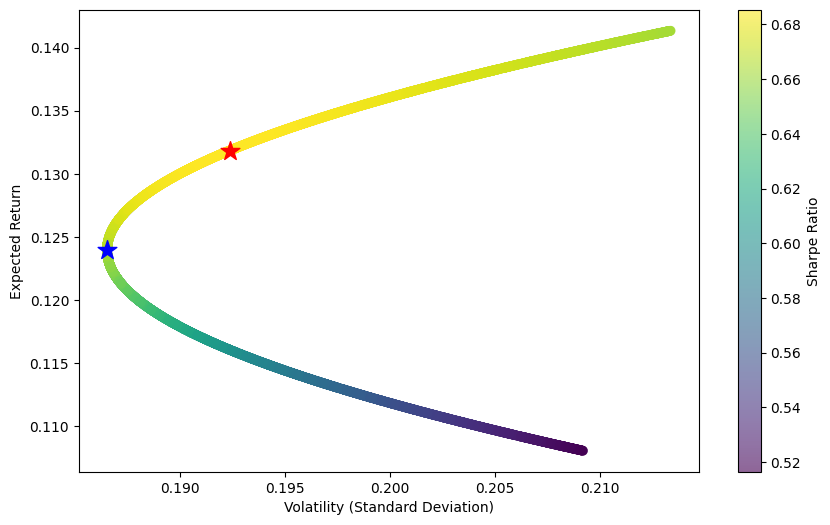

In [18]:
# Step 6: Plot the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1], results[0], c=results[2], cmap='viridis', marker='o', alpha=0.6)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], color='red', marker='*', s=200, label="Max Sharpe Ratio")
plt.scatter(results[1, min_vol_idx], results[0, min_vol_idx], color='blue', marker='*', s=200, label="Min Volatility")
plt.xlabel("Volatility (Standard Deviation)")
plt.ylabel("Expected Return")